# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [1]:
#SOM example using wines data set
library(kohonen)

set.seed(7) #entrega el valor inicial para stats y simed

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

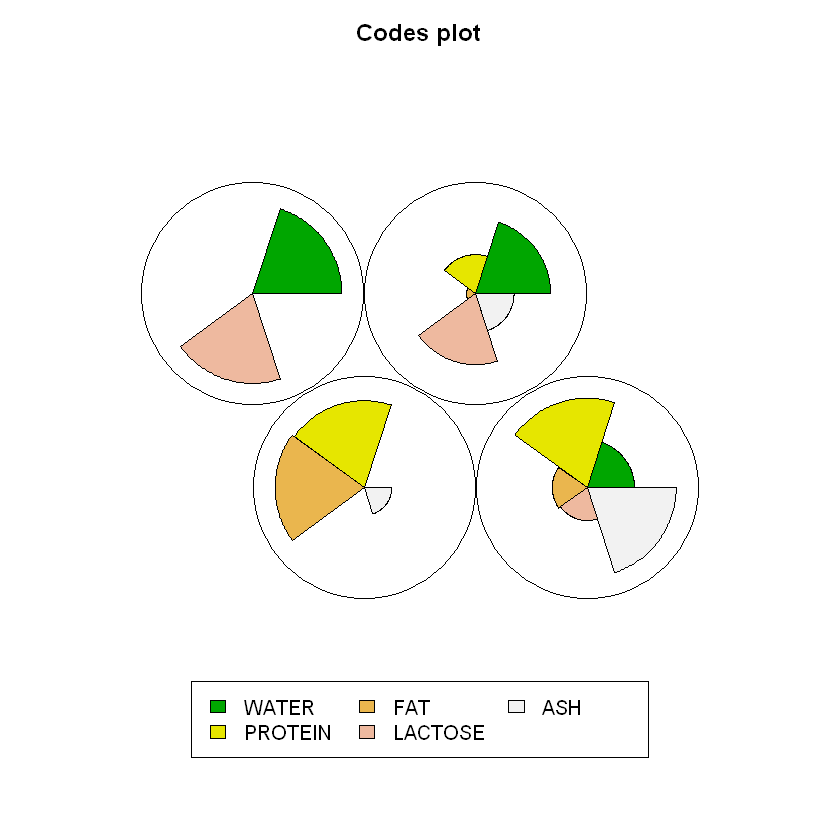

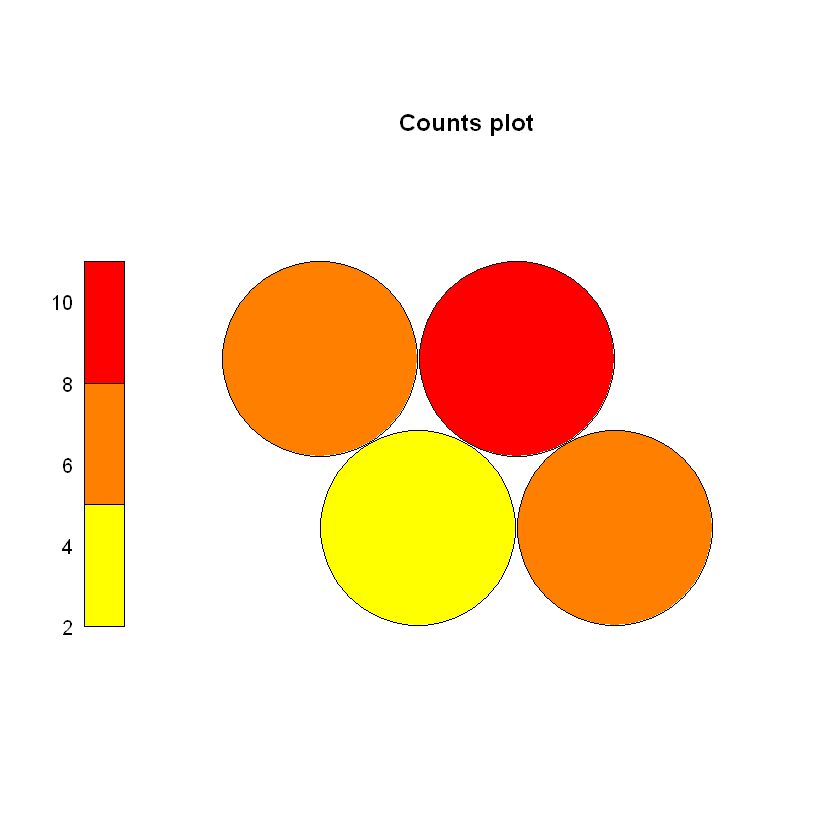

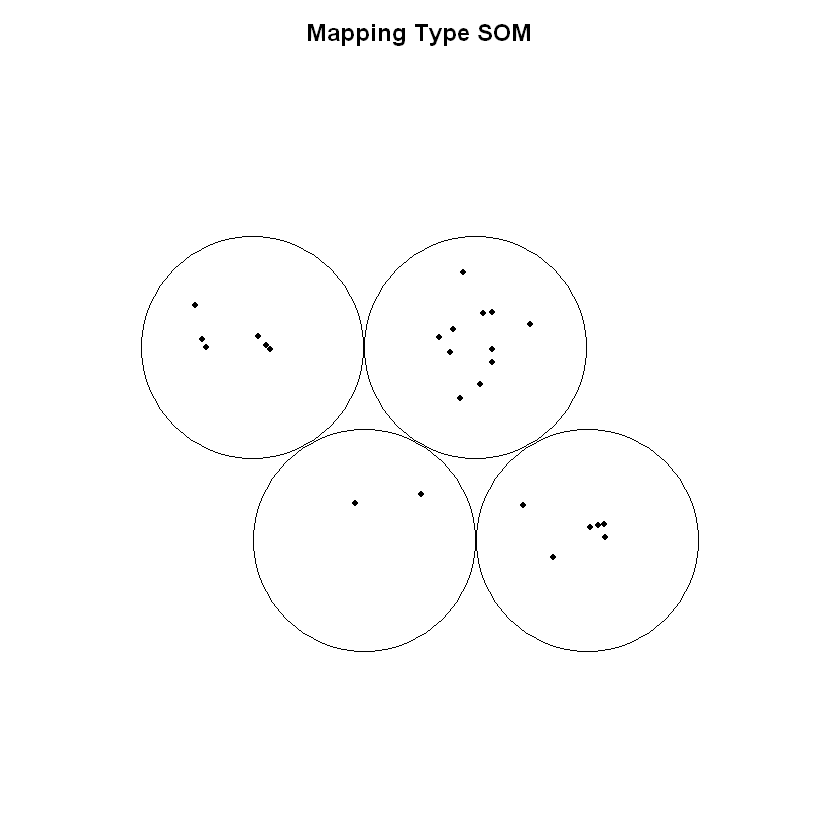

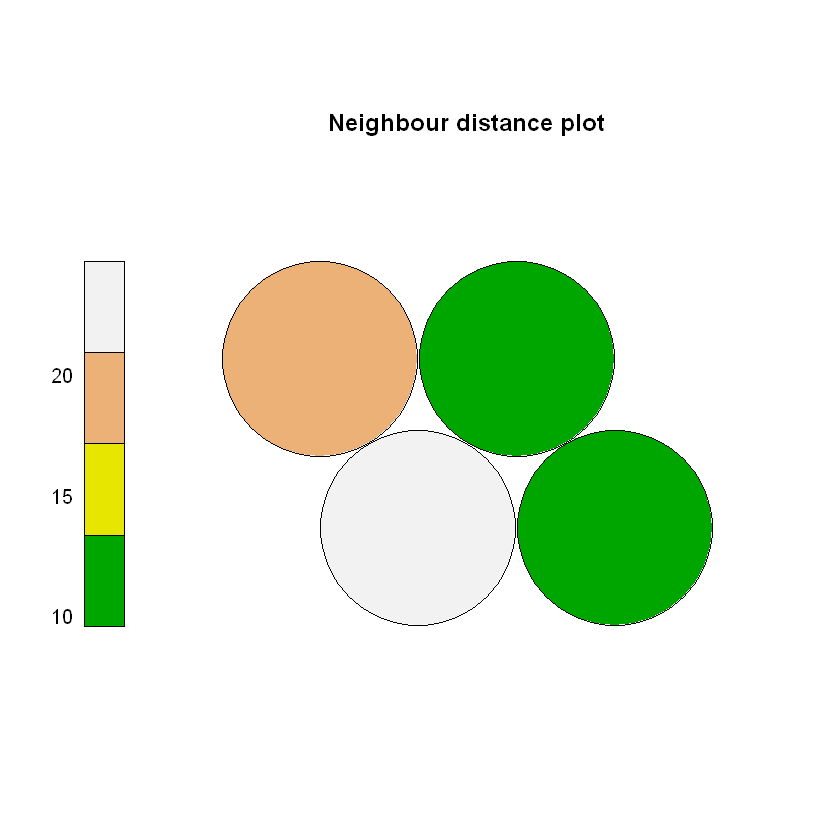

In [2]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal")) #transforma datos en 2d
plot(sommap)
colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}
plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

<b>A) El metodo som toma un dataframe (en este caso escalado con valores de -1 a 1), el grid que es la cuadricula en este caso 2d. La salida es un mapa auto organizado de cuadricula 2x2 en este caso.
</b>

-Codes plot: Realiza un grafico de torta donde se grafica los componentes por grupo, el tamaño de cada parte de la torta representa la proporcion del componente que posee el grupo.

-Counts plot: El grafico representa la cantidad de integrantes que posee cada grupo

-Mapping Type SOM: Muestra los que estan en el grupo en forma de puntos y su lejania entre ellos representa la disimilitud entre ellos.

-Neighbour distance plot: Representa la suma de la distancia que hay entre los elementos del mismo grupo.

<b>B) </b>

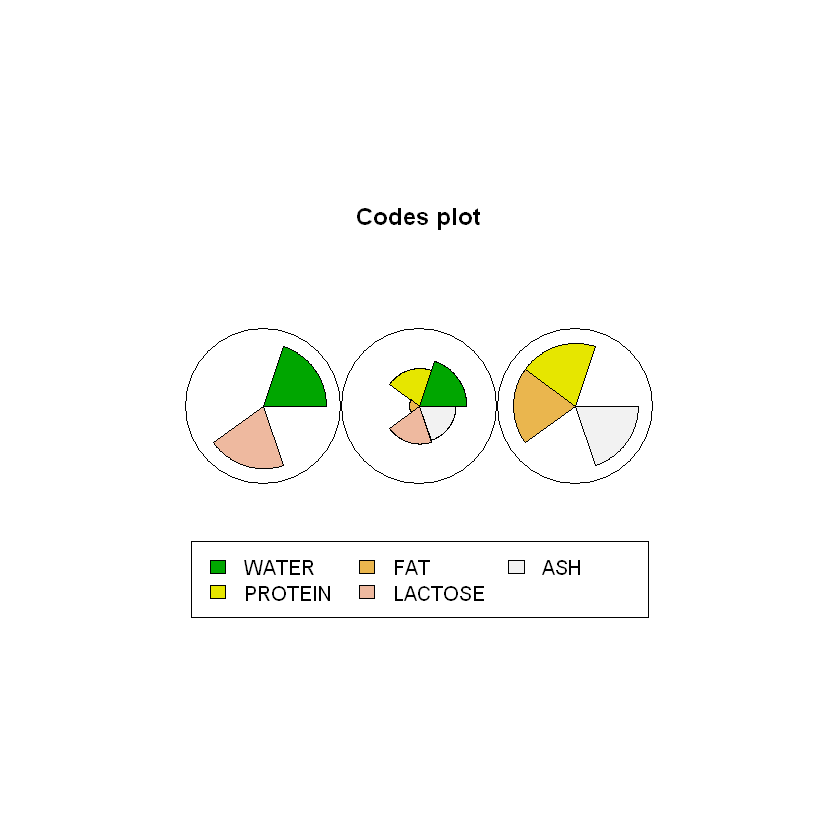

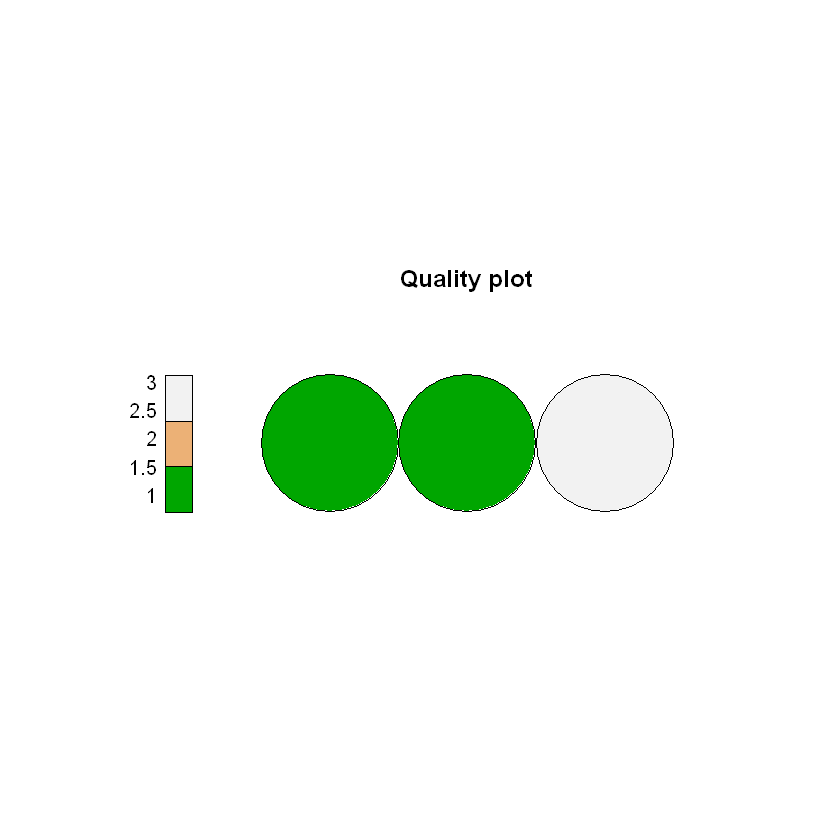

In [15]:
sommp <- som(scale(datos), grid = somgrid(3, 1, "hexagonal")) #transforma datos en 2d
plot(sommp)
plot(sommp, type = "quality", palette.name = terrain.colors)

-El grafico de Quality Representa la distancia media entre los elementos de cada grupo
Segun lo que muestra el grafico

-Se redujo la cantidad de elementos agrupados en 3, se puede ver que la distancia media esta entre 1 y 1.5 entre sus unidades y el ultimo grupo de 3.

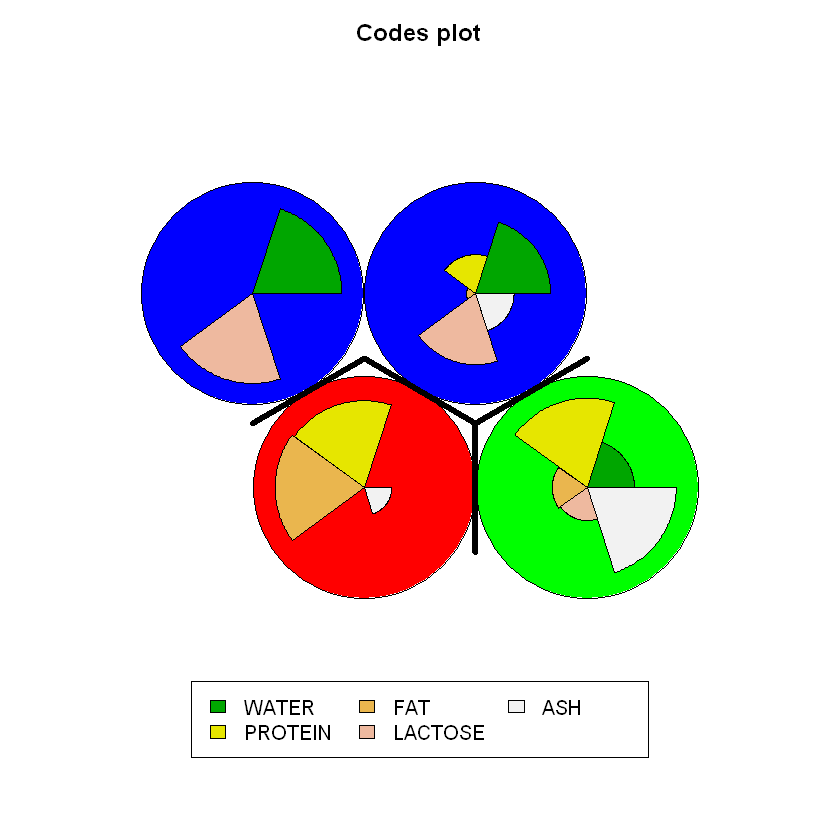

In [17]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)
#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 
a) Explique como funciona esta nueva visualización.

-R: La nueva visualizacion es un codes plot que posee un color en el circulo que representa un grupo, los que posean el mismo color significa que son parte de la misma clase ya que se utilizó un hierachical clust para crearlo un dendograma que se cortaria con cutree en 3 partes. por ultimo, el add.cluster.boundaries sirve para agregar lineas para decir que grupos deberian clusterizarse juntos.


b) Interprete y comente los resultados obtenidos. 

-R: Los resultados son que el primer y el segundo grupo (que estan de color azul) deberian pertenecer a un mismo grupo ya que analizando los componentes del codes plot (Que muestra que poseen una proporcion parecida de agua y lactosa) y el add.cluster.boudaries que dice que los grupos no deberian estar separados (debido a las lineas que los separan de los otros grupos pero no de ellos mismos).

Ejercicio 3: 
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección


-R: Escogí el diagnostico de fertilidad debido a que encuentro que es un problema interesante a analizar, Tambien me gustaria ver si la maquina puede separar los grupos de este problema entre N y O, que corresponde a modificado o no modificado


b) Realice las estimaciones y discuta sus resultados.

In [34]:
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}
data <- read.csv("fertility_diagnosis.txt",sep=",",header=TRUE)
summary(data)
clases<- data$output.diagnosis
print(clases)
ft<-data[1:9]

     Season             Age        Childish.diseases    Accident   
 Min.   :-1.0000   Min.   :0.500   Min.   :0.00      Min.   :0.00  
 1st Qu.:-1.0000   1st Qu.:0.560   1st Qu.:1.00      1st Qu.:0.00  
 Median :-0.3300   Median :0.670   Median :1.00      Median :0.00  
 Mean   :-0.0789   Mean   :0.669   Mean   :0.87      Mean   :0.44  
 3rd Qu.: 1.0000   3rd Qu.:0.750   3rd Qu.:1.00      3rd Qu.:1.00  
 Max.   : 1.0000   Max.   :1.000   Max.   :1.00      Max.   :1.00  
 Surgical.intervention High.fevers.in.the.last.year
 Min.   :0.00          Min.   :-1.00               
 1st Qu.:0.00          1st Qu.: 0.00               
 Median :1.00          Median : 0.00               
 Mean   :0.51          Mean   : 0.19               
 3rd Qu.:1.00          3rd Qu.: 1.00               
 Max.   :1.00          Max.   : 1.00               
 Frequency.of.alcohol.consuption Smoking.habit   Hours.sitting.per.day
 Min.   :0.200                   Min.   :-1.00   Min.   :0.0600       
 1st Qu.:0.800    

  [1] N O N N O N N N N N N N N N N N N O N O N N N O N N O O N O N N N N N N N
 [38] N O N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N N O N N N
 [75] N N N N N N N N N N O N N N N N N N N O N N N N N N
Levels: N O


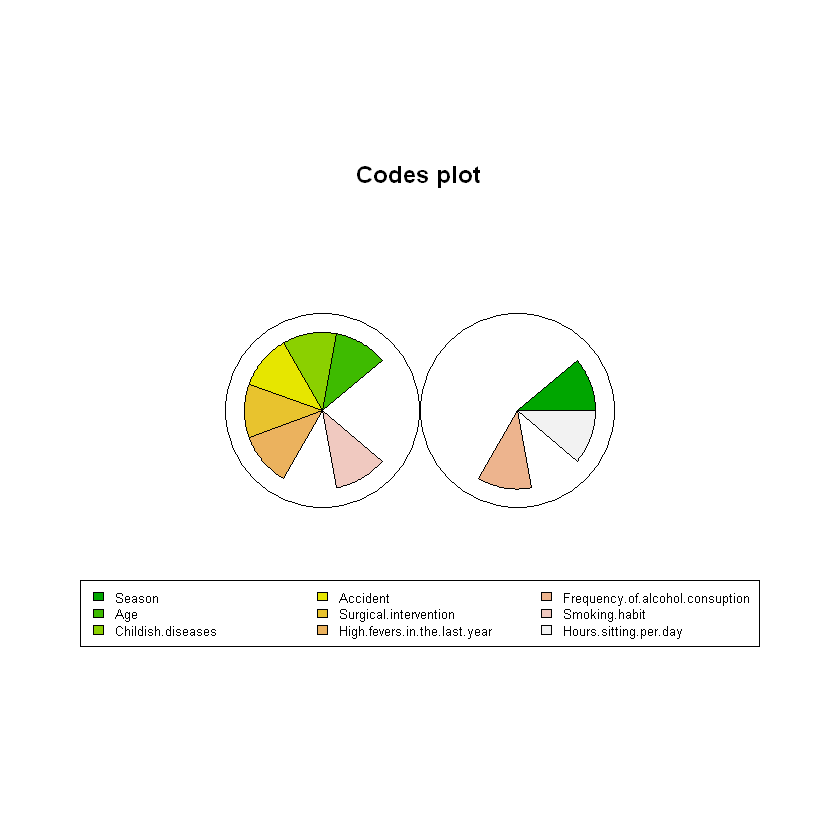

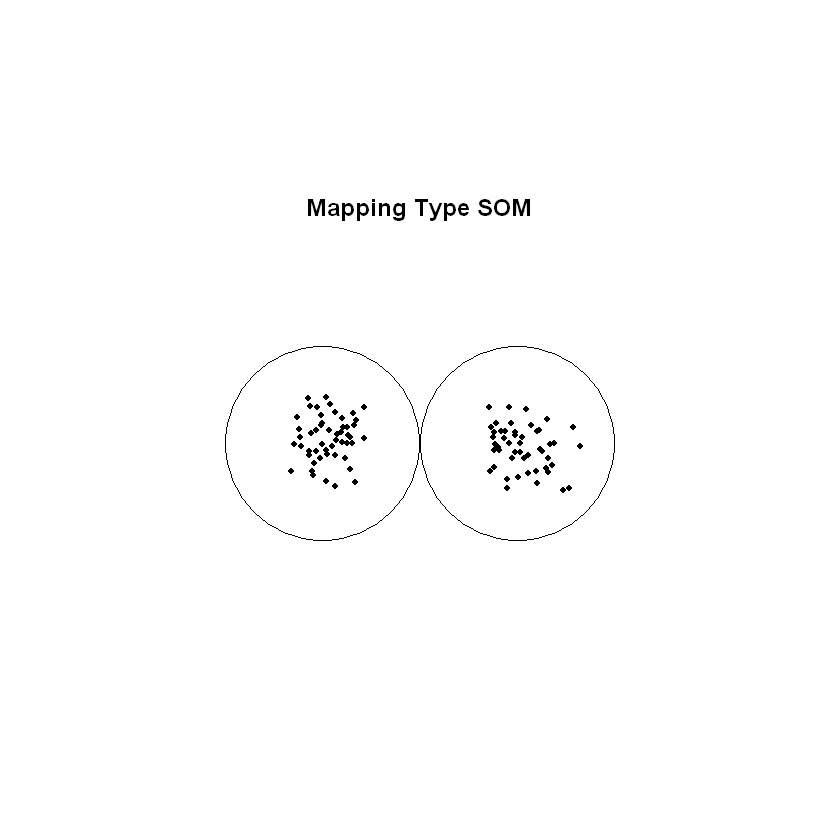

In [41]:
smap<- som(scale(ft), grid = somgrid(2, 1, "hexagonal"))
plot(smap)
plot(smap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

Se ejecuto varias veces el codigo y se producen graficos distintos, esto se debe a que los datos son muy parecidos entre si o no son necesarios para determinar si pertenecen a algun grupo.

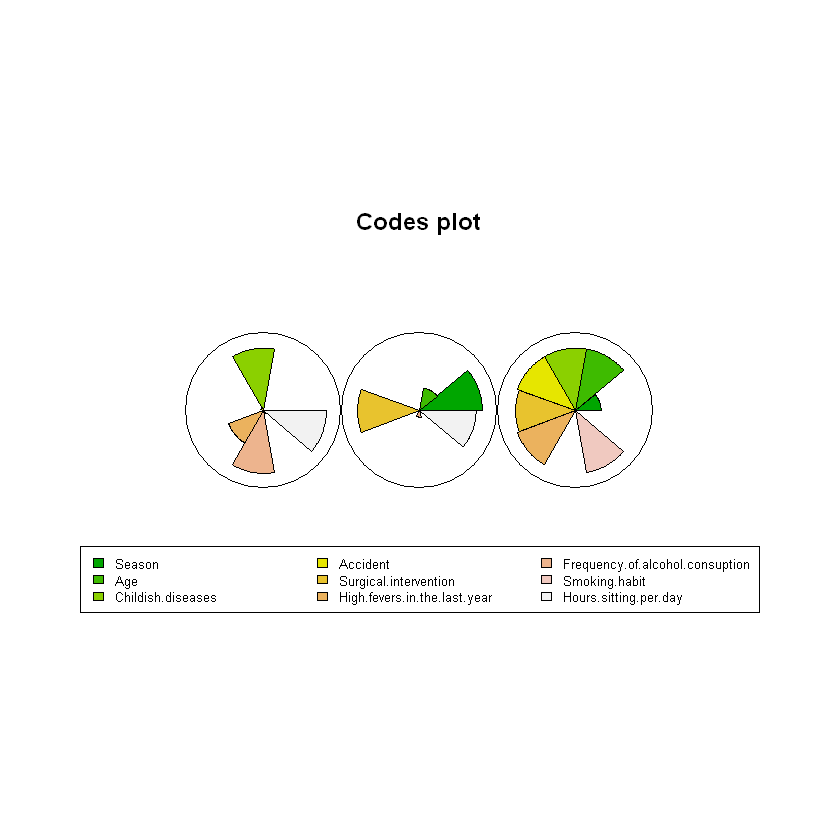

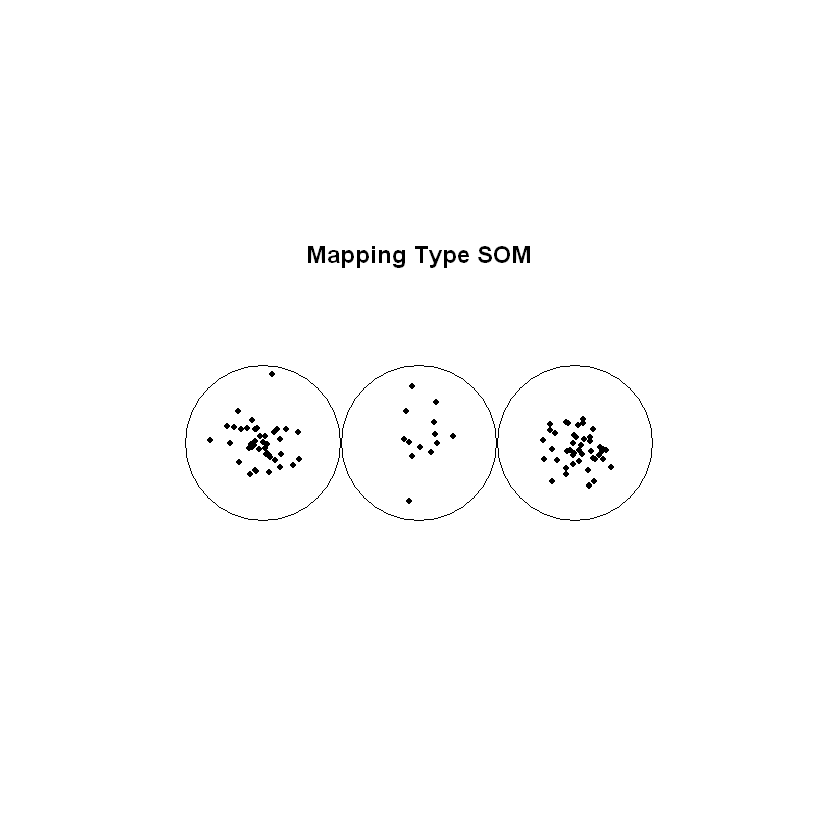

In [75]:
smap<- som(scale(ft), grid = somgrid(3, 1, "hexagonal"))
plot(smap)
plot(smap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

con tres grupos los datos no cambian, por tanto se concluye que los grupos generados no estan relacionados con el diagnostico modificado o no modificado